In [6]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
data.head(5)
mini = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv')

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Drop missing values from embarked
data = data.dropna()

# Let's treat Pclass as categorical
data['Pclass_cat'] = data['campaign'].astype('category')

# Encode our features and target as needed
features = ['Pclass_cat', 'job', 'marital', 'education']
X = pd.get_dummies(data[features], drop_first=True)
y = data['y']

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Build the decision tree
clf = DecisionTreeClassifier()

# Train it
clf.fit(X_train, y_train)

# Test it
clf.score(X_test, y_test)

0.8816653178670982

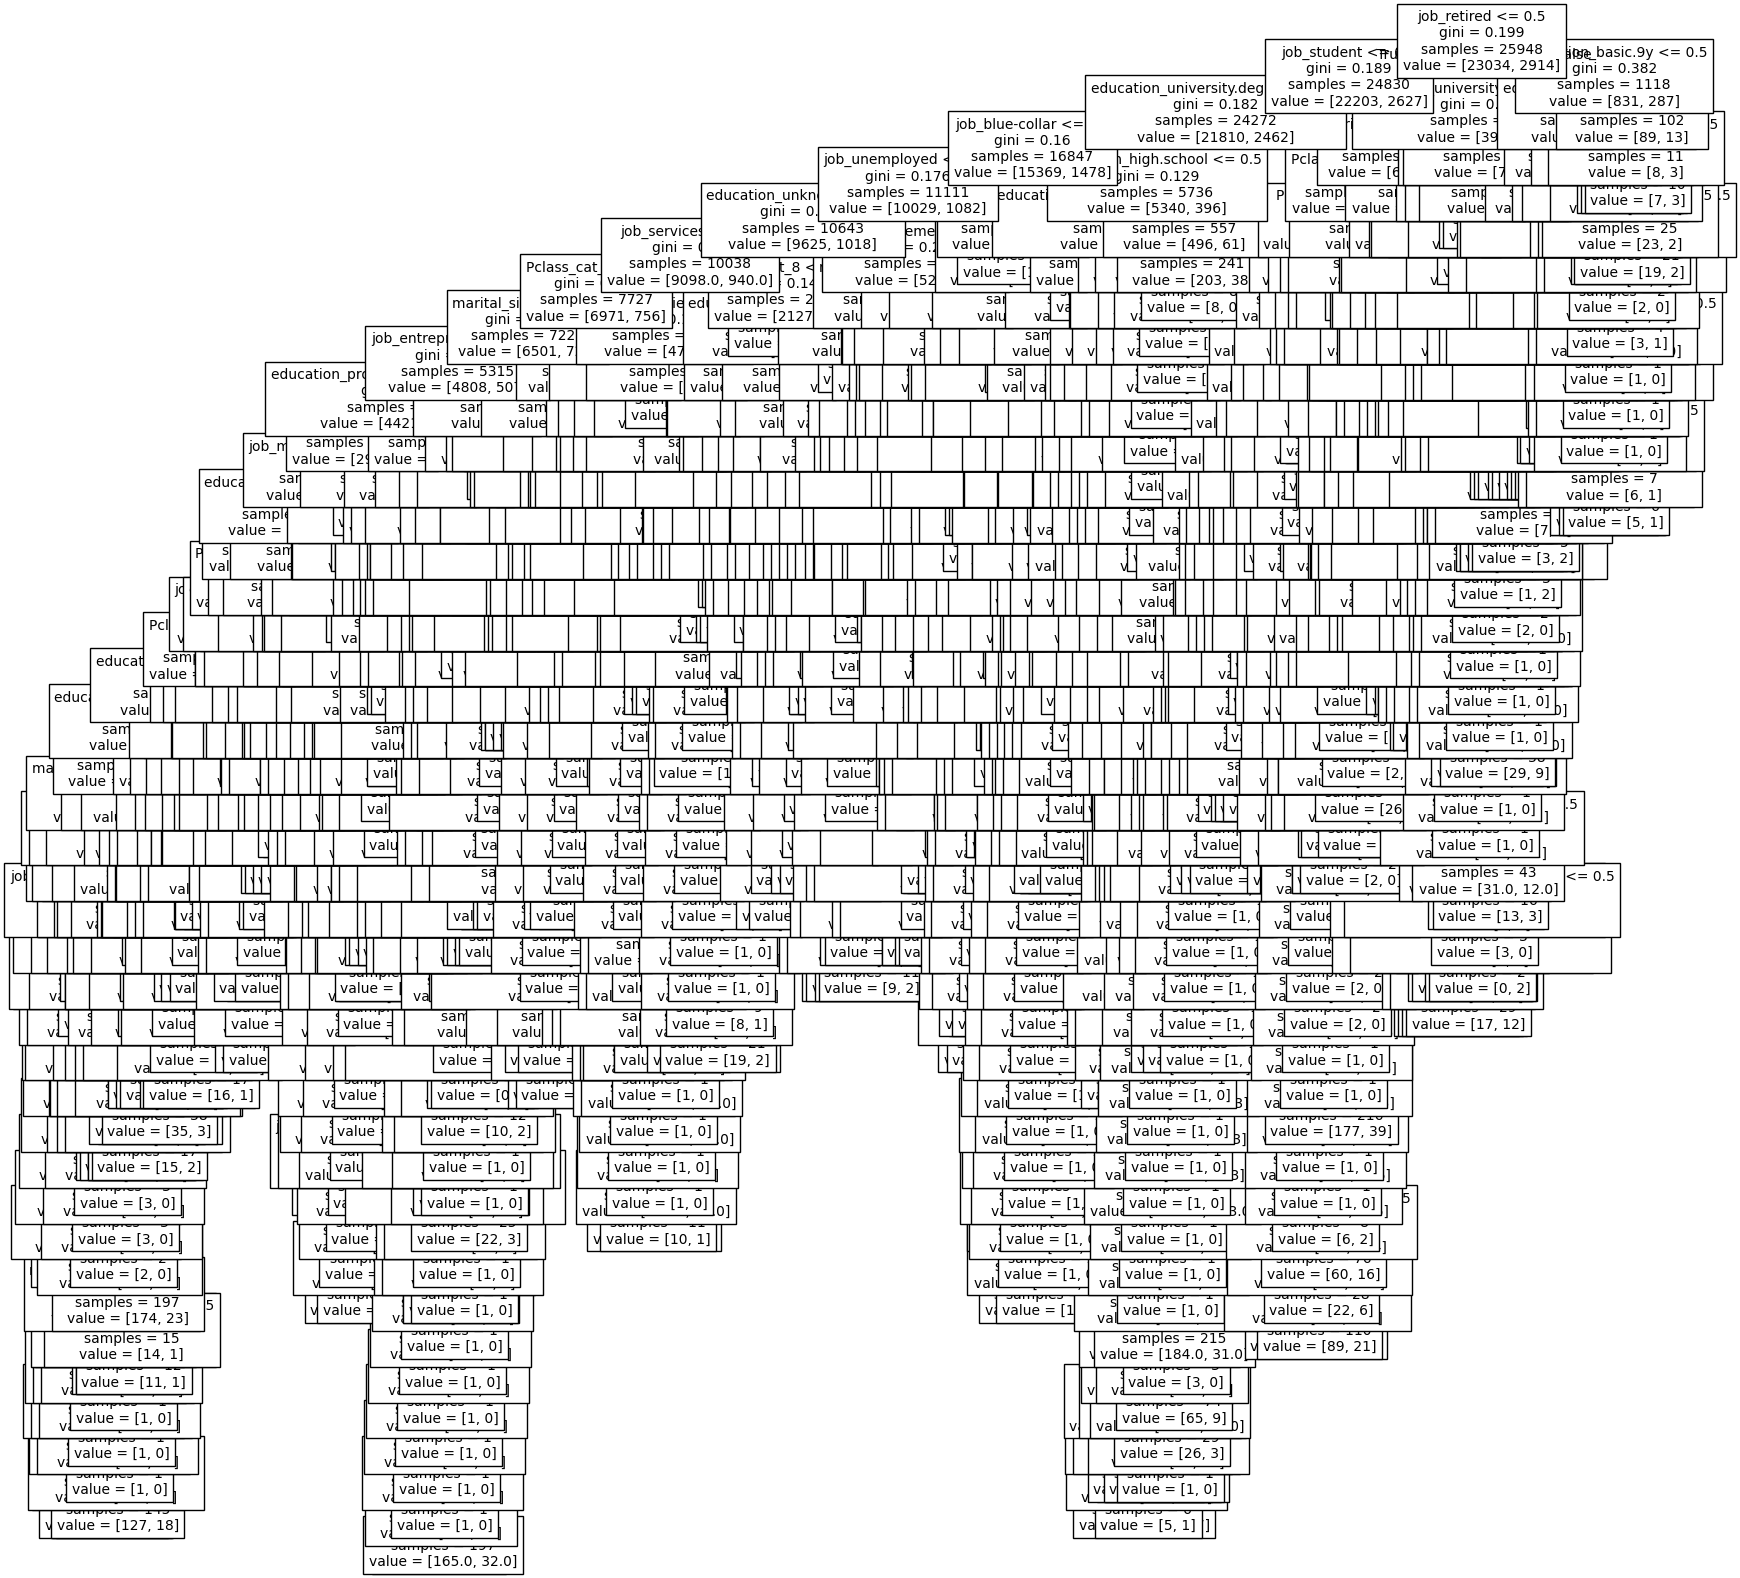

In [3]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()

In [11]:
print("Training columns:", list(data.columns))
print("Test columns:", list(test.columns))

Training columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
Test columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [13]:
test = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")

# Do same transformations as on the training set
test['Pclass_cat'] = test['campaign'].astype('category')  # Assuming 'campaign' exists in test data
test = pd.get_dummies(test[features], drop_first=True)
predictions = clf.predict(test)

# Convert the predictions to a dataframe and label the column 'y'
my_predictions = pd.DataFrame(predictions, columns = ['y'])

# Replace PUTTEAMNUMBERHERE with your team
my_predictions.to_csv("team08-module2-predictions.csv",index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Pclass_cat_10
- Pclass_cat_14
- Pclass_cat_15
- Pclass_cat_16
- Pclass_cat_17
- ...


In [20]:
from google.colab import files
test_data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")

# Preprocess the holdout test data
test_data['Pclass_cat'] = test_data['campaign'].astype('category')
X_test_holdout = pd.get_dummies(test_data[features], drop_first=True)
X_test_holdout = X_test_holdout.reindex(columns=X.columns, fill_value=0)

# Make predictions on the holdout dataset
predictions = clf.predict(X_test_holdout)

# Save predictions to a CSV file
output = pd.DataFrame(predictions, columns=['y'])
output.to_csv("team08-module2-predictions.csv", index=False)


from google.colab import drive

drive.mount('/content/drive')
output.to_csv('/content/drive/My Drive/team08-module2-predictions.csv', index=False)

Mounted at /content/drive


In [16]:
predictions = pd.read_csv("team08-module2-predictions.csv")
print(predictions.head())


    y
0  no
1  no
2  no
3  no
4  no
